Apple quality

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving apple_quality.csv to apple_quality.csv


In [ ]:
import pandas as pd
po = pd.read_csv('/content/apple_quality.csv')
po.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
po.drop(columns=['Quality', 'A_id'], inplace=True)

In [ ]:
po[['Acidity']] = po[['Acidity']].apply(pd.to_numeric, errors='coerce')

In [ ]:
po

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy='mean')
kp = sim.fit_transform(po)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
min = MinMaxScaler()
lo = min.fit_transform(kp)

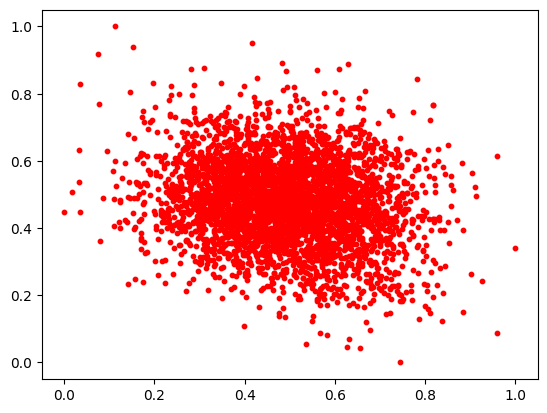

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(lo[:,0], lo[:,1], c='red', s=10)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
mu = pca.fit_transform(lo)

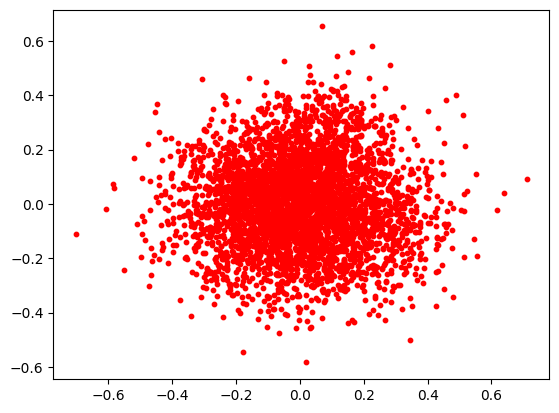

In [ ]:
plt.scatter(mu[:,0], mu[:,1], c='red', s=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

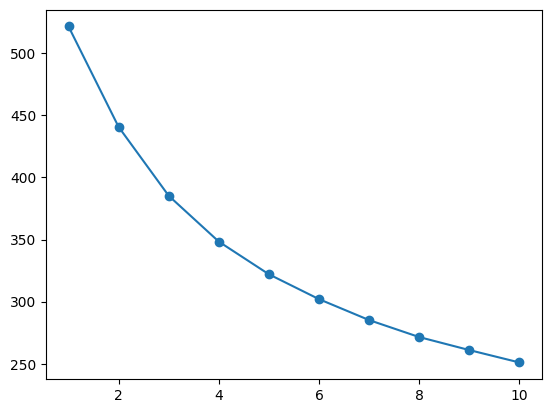

In [ ]:
from sklearn.cluster import KMeans
dis = []
for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
  km.fit(mu)
  dis.append(km.inertia_)

plt.plot(range(1,11), dis, marker='o')

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=100, random_state=42)
yjk = km.fit_predict(mu)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


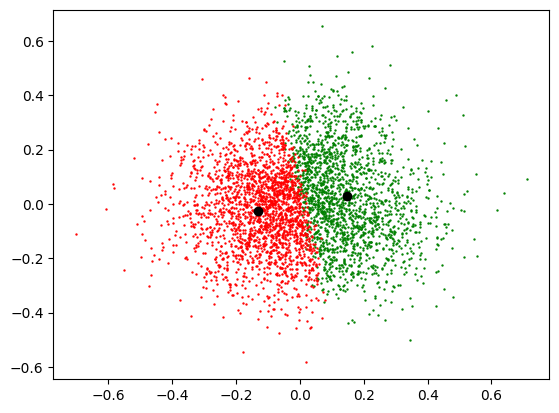

In [ ]:
plt.scatter(mu[yjk == 0,0], mu[yjk == 0,1], s=0.5, c='green', label='cluster 1')
plt.scatter(mu[yjk == 1,0], mu[yjk == 1,1], s=0.5, c='red', label='cluster 1')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1], c='black')

In [ ]:
po['Group'] = yjk
po.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Group
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


In [ ]:
po.value_counts('Group')

Group
1    2137
0    1864
dtype: int64

In [ ]:
ji = pd.read_csv('/content/apple_quality.csv')
ji.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
ji.value_counts('Quality')

Quality
good    2004
bad     1996
dtype: int64

Sentiment Analysis

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving eng_dataset.csv to eng_dataset.csv


In [ ]:
import pandas as pd
pl = pd.read_csv('eng_dataset.csv')
pl.head()

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.feature_extraction.text as text
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
import re
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
vr = pd.read_csv('/content/eng_dataset.csv')
vr.head()

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [ ]:
vr.drop(columns='ID', inplace=True)

In [ ]:
vr['content'] = vr['content'].apply(lambda x: ' '.join(x.replace('[^\w\s]',' ') for x in x.split()))
vr['content'] = vr['content'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
stop = stopwords.words('english')
vr['content'] = vr['content'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
vr['content'] = vr['content'].apply(lambda x: ' '.join(x.replace("<br\\s*/?>",' ') for x in x.split()))
vr['content'] = vr['content'].apply(lambda x: ' '.join(x.replace("[^a-zA-Z']",' ') for x in x.split()))
vr['content'] = vr['content'].apply(lambda x: str(TextBlob(x).correct()))
vr.head()

,sentiment,content
0,anger,point today someone says something remote kind...
1,anger,@corningfootball game day!!!! minus 14:30 #rel...
2,anger,game passed game year. blood boiling! time tur...
3,anger,@spamvicious i've found candle bandage. out li...
4,anger,@moocowward @mrsajhargreaves @melly77 @garybar...


In [ ]:
st = PorterStemmer()
vr['content'] = vr['content'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [ ]:
vr.head()

,sentiment,content
0,anger,"point today someon say someth remot kind me, w..."
1,anger,@corningfootbal game day!!!! minu 14:30 #relen...
2,anger,game pass game year. blood boiling! time turn ...
3,anger,@spamvici i'v found candl bandage. out like of˜
4,anger,@moocowward @mrsajhargreav @melly77 @garybarlo...


In [ ]:
vr['sentiment'].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [ ]:
label = preprocessing.LabelEncoder()
vr['sentiment'] = label.fit_transform(vr['sentiment'])

In [ ]:
vr.value_counts('sentiment')

sentiment
1    2252
0    1701
2    1616
3    1533
dtype: int64

In [ ]:
x = vr['content']
y = vr['sentiment']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
cv = CountVectorizer()
cv.fit(x)
cvxtrain = cv.fit_transform(x_train)
cvxtest = cv.transform(x_test)

tf = TfidfVectorizer()
tfxtrain = tf.fit_transform(x_train)
tfxtest = tf.transform(x_test)

In [ ]:
naive = naive_bayes.MultinomialNB()
naive.fit(cvxtrain, y_train)
lp = naive.predict(cvxtest)
pl = metrics.accuracy_score(lp, y_test)
ko = naive.predict(cvxtrain)
ok = metrics.accuracy_score(ko, y_train)
print(pl)
print(ok)
naive = naive_bayes.MultinomialNB()
naive.fit(tfxtrain, y_train)
lp = naive.predict(tfxtest)
pl = metrics.accuracy_score(lp, y_test)
ko = naive.predict(tfxtrain)
ok = metrics.accuracy_score(ko, y_train)
print(pl)
print(ok)

0.8205489092188599
0.9535293082203837
0.7543983110485574
0.9244851258581236


In [ ]:
logis = linear_model.LogisticRegression(C=100, multi_class='ovr', penalty='l2', solver='liblinear',max_iter=1000)
logis.fit(cvxtrain, y_train)
iu = logis.predict(cvxtest)
ui = metrics.accuracy_score(iu, y_test)
tr = logis.predict(cvxtrain)
rt = metrics.accuracy_score(tr, y_train)
print(ui)
print(rt)

0.8451794510907812
0.9781728568913923


In [ ]:
print(classification_report(y_true=y_test, y_pred=iu))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       340
           1       0.82      0.89      0.85       451
           2       0.91      0.90      0.90       323
           3       0.78      0.74      0.76       307

    accuracy                           0.85      1421
   macro avg       0.85      0.84      0.84      1421
weighted avg       0.85      0.85      0.84      1421



In [ ]:
scv = svm.SVC()
scv.fit(cvxtrain, y_train)
hy = scv.predict(cvxtest)
yh = metrics.accuracy_score(hy, y_test)
qw = scv.predict(cvxtrain)
wq = metrics.accuracy_score(qw, y_train)
print(yh)
print(wq)

0.8437719915552427
0.9698996655518395


Restaurant Reviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ll = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')
ll.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [ ]:
ll['Review'] = ll['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
ll['Review'] = ll['Review'].str.replace('[^\w\s]', " ")

<ipython-input-123-9c80895a5c0e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ll['Review'] = ll['Review'].str.replace('[^\w\s]', " ")


In [ ]:
ll.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [ ]:
ll['Review'] = ll['Review'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
ll['Review'] = ll['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
reviews = ll

In [ ]:
reviews.dropna(inplace=True)

In [ ]:
print(reviews.groupby('Review').count())

                                                    Liked
Review                                                   
     the owners really really need to quit bein...      1
  both the hot   sour   the egg flower soups we...      1
  really  really good rice  all the time                1
  the food is rich so order accordingly                 1
  they never brought a salad we asked for               1
...                                                   ...
you can watch them preparing the delicious food         1
you get incredibly fresh fish  prepared with care       1
you won t be disappointed                               1
your serves suck  wait  correction  our server ...      1
your staff spends more time talking to themselv...      1

[995 rows x 1 columns]


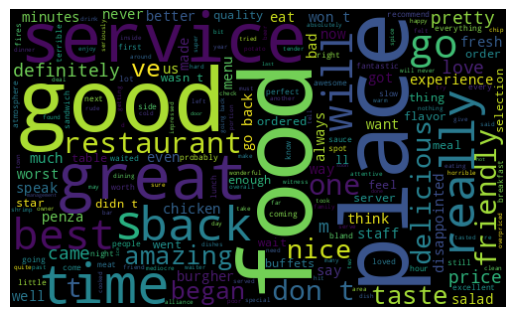

In [ ]:
from wordcloud import WordCloud

allmensagem = ' '.join(ll['Review'])
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(allmensagem)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='Liked', ylabel='count'>

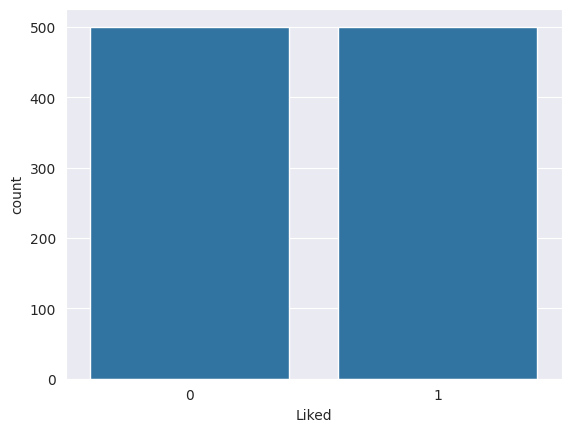

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='Liked', data=reviews)

In [ ]:
reviews['Length'] = reviews['Review'].apply(len)

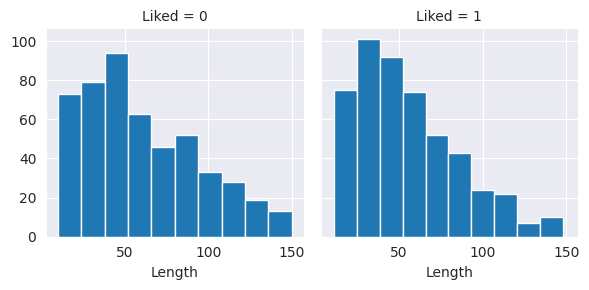

In [ ]:
g = sns.FacetGrid(reviews, col='Liked')
g.map(plt.hist, 'Length');

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(reviews['Review'])
y = reviews['Liked']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)
model = LogisticRegression(C=5, solver='lbfgs', penalty='l2')
model.fit(x_train, y_train)
er = model.predict(x_test)
re = accuracy_score(er, y_test)
nu = model.predict(x_train)
yu = accuracy_score(nu, y_train)
print(re)
print(yu)

0.845
0.99875


In [ ]:
print(classification_report(er, y_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        95
           1       0.87      0.83      0.85       105

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=er))

[[82 18]
 [13 87]]


In [ ]:
texts = ["the owners really really need to quit bein"]
text_features = cv.transform(texts)
predictions = model.predict(text_features)
print(texts)
print("  - Predicted as: '{}'".format([predictions[0]]))

['the owners really really need to quit bein']
  - Predicted as: '[1]'


In [ ]:
texts = ['not tasty and the texture was just nasty']
text_features = cv.transform(texts)
predictions = model.predict(text_features)
print(texts)
print("  - Predicted as: '{}'".format([predictions[0]]))

['not tasty and the texture was just nasty']
  - Predicted as: '[0]'


In [ ]:
texts = ["I didn't like the settling"]
text_features = cv.transform(texts)
predictions = model.predict(text_features)
print(texts)
print("  - Predicted as: '{}'".format([predictions[0]]))

["I didn't like the settling"]
  - Predicted as: '[0]'


Spam mail

In [ ]:
import email
import glob
import numpy as np
from operator import is_not
from functools import partial
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [ ]:
ff = pd.read_csv('spam.csv', encoding='latin1')
ff.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
gg = pd.read_csv('spam_ham_dataset.csv', encoding='latin1')
gg.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
gg.drop(columns=['Unnamed: 0','label'], inplace=True)

In [ ]:
gg.isnull().sum()

text         0
label_num    0
dtype: int64

In [ ]:
gg.tail()

,text,label_num
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0
5170,Subject: important online banking alert\r\ndea...,1


In [ ]:
x = gg['text']
y = gg['label_num']

In [ ]:
print(x.shape)
print(y.shape)

(5171,)
(5171,)


In [ ]:
 >>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
  stop_free = ' '.join(
      [i for i in doc.lower().split() if i not in stop]
  )
  punc_free = ''.join(
      [ch for ch in stop_free if ch not in exclude ]
  )
  norm = ' '.join(
      lemma.lemmatize(word) for word in punc_free.split()
  )
  return norm


In [ ]:
x.apply(clean)

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom january 9 2001 see attached fi...
2       subject neon retreat ho ho ho around wonderful...
3       subject photoshop window office cheap main tre...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put 10 ft transport volume decreased 2...
5167    subject 3 4 2000 following noms hpl take extra...
5168    subject calpine daily gas nomination julie men...
5169    subject industrial worksheet august 2000 activ...
5170    subject important online banking alert dear va...
Name: text, Length: 5171, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
xvec = vec.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xvec,y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='rbf', C=1.0, gamma=1.0,probability=True)
svm_classifier.fit(x_train, y_train)

SVC(gamma=1.0, probability=True)

In [ ]:
svm_classifier.score(x_train, y_train)

1.0

In [ ]:
svm_classifier.score(x_test, y_test)

0.9816425120772947

In [ ]:
from sklearn import metrics
pred = svm_classifier.predict(x_test)
print(metrics.accuracy_score(pred, y_test))
print(metrics.precision_score(pred, y_test))
print(metrics.recall_score(pred, y_test))
print(metrics.f1_score(pred, y_test))

0.9816425120772947
0.9933333333333333
0.946031746031746
0.9691056910569105


In [ ]:
from sklearn import naive_bayes
nb_classifier = naive_bayes.MultinomialNB(alpha=1.0)
nb_classifier.fit(x_train, y_train)
print(nb_classifier.score(x_train, y_train))
print(nb_classifier.score(x_test, y_test))

0.9170696324951644
0.8859903381642512
